# End to End ML Workflow

Steps:
1. Data acquisition
2. Data sanity check
3. EDA
4. Data preprocessing
5. Feature Engineering/Selection--RFE / Statistical methods (ANOVA or CHi-square)
6. Modelling
7. Model comparisons
8. mODEL OPTIMIZATION
8. Model Interpretation
9. Model DEPLOYMENT

In [3]:
# load the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
import pycaret
import shap
warnings.filterwarnings('ignore')
print("All libraries are imported")

All libraries are imported


In [4]:
#!pip install shap

In [5]:
# get the data
df=pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


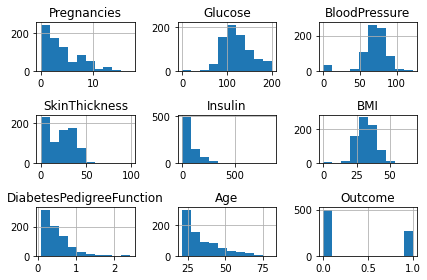

In [9]:
df.hist()
plt.tight_layout()
plt.show()

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median() )
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].median() )
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median() )
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median() )
df['BMI']=df['BMI'].replace(0,df['BMI'].median() )

In [12]:
%%writefile utils.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
df=pd.read_csv("data/diabetes.csv")

# code to create distributions
def distributions(df):
    df.hist()
    plt.tight_layout()
    plt.show()
    
# create single distributions functions
def histograms(df):
    for col in df.select_dtypes(exclude='O').columns:
        import seaborn as sns
        print('Distribution of column', col)
        sns.distplot(df[col])
        plt.show()
        print('*********************************************')
        
        
# metrics evaluation
def evaluate(df,y_pred, y_test, model_name):
    print("Metrics for model", model_name)
    print("Accuracy score is ", metrics.accuracy_score(y_pred, y_test))
    print('')
    print("f1 score is ", metrics.f1_score(y_pred, y_test))
    print('')
    print("ROC-AUC score is ", metrics.roc_auc_score(y_pred, y_test))
    print('')
    print("Classification Report is ", metrics.classification_report(y_pred, y_test))
    print('')

Overwriting utils.py


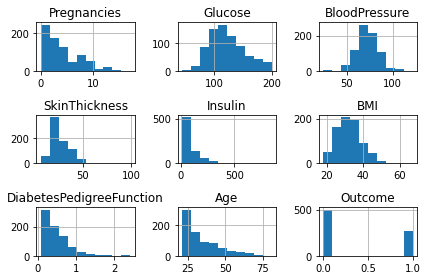

In [13]:
import utils
utils.distributions(df)

Distribution of column Pregnancies


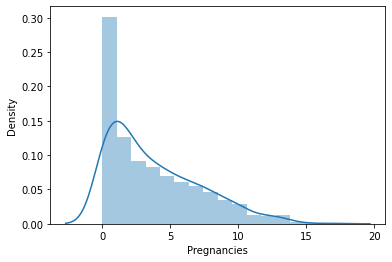

*********************************************
Distribution of column Glucose


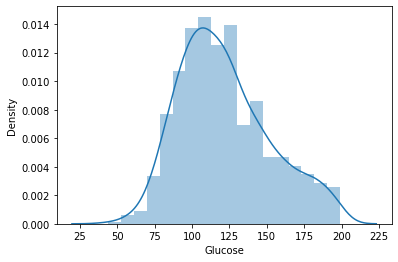

*********************************************
Distribution of column BloodPressure


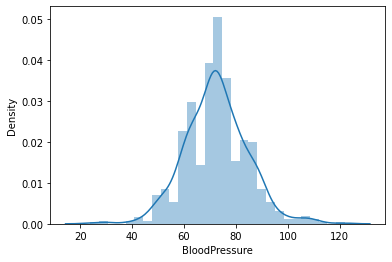

*********************************************
Distribution of column SkinThickness


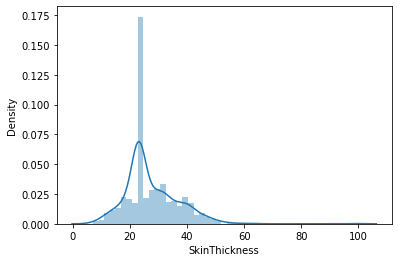

*********************************************
Distribution of column Insulin


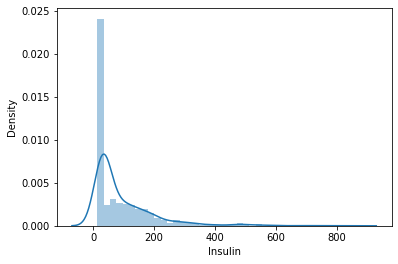

*********************************************
Distribution of column BMI


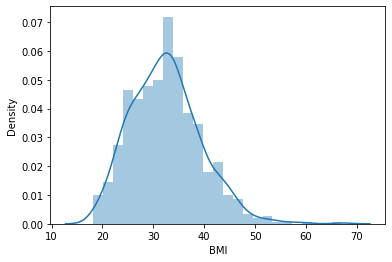

*********************************************
Distribution of column DiabetesPedigreeFunction


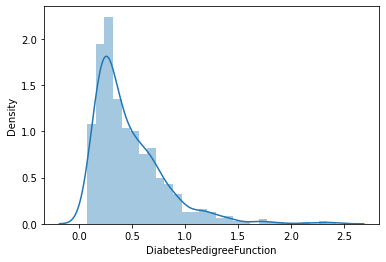

*********************************************
Distribution of column Age


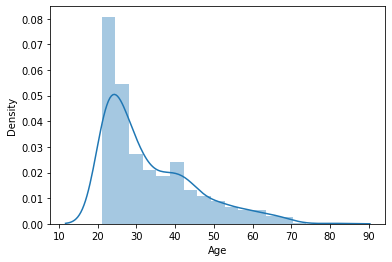

*********************************************
Distribution of column Outcome


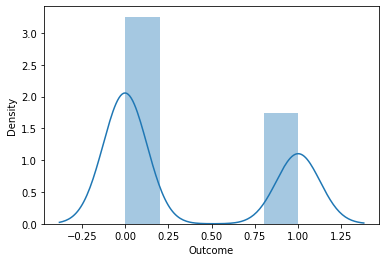

*********************************************


In [14]:
utils.histograms(df)

In [17]:
#Modelling 
X=df.drop('Outcome', axis=1)
y=df.Outcome
x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=21)
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=15)
rfc.fit(x_train, y_train)
y_pred=rfc.predict(x_test)
utils.evaluate(df,y_pred, y_test, 'Random Forest')

Metrics for model Random Forest
Accuracy score is  0.7708333333333334

f1 score is  0.6393442622950819

ROC-AUC score is  0.7688777638715061

Classification Report is                precision    recall  f1-score   support

           0       0.90      0.77      0.83       141
           1       0.55      0.76      0.64        51

    accuracy                           0.77       192
   macro avg       0.73      0.77      0.74       192
weighted avg       0.81      0.77      0.78       192




In [19]:
# OPTIMIZE THIS MODEL
param_grid={
    'n_estimators':[100,200],
    'max_depth':range(5, 20, 5),
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_features':['sqrt', 'log2'],
    'criterion':['entropy', 'gini']
}
n_folds=5
grid=GridSearchCV(estimator=rfc, param_grid=param_grid, cv=n_folds, n_jobs=-1, return_train_score=True)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 20, 5),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 200]},
             return_train_score=True)

In [20]:
grid.best_score_

0.7830584707646178

In [21]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [24]:
tuned_model

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=6, random_state=15)

In [23]:
tuned_model=grid.best_estimator_
tuned_model.fit(x_train, y_train)
y_pred=tuned_model.predict(x_test)
utils.evaluate(df, y_pred, y_test, 'Tuned RFC')

Metrics for model Tuned RFC
Accuracy score is  0.765625

f1 score is  0.6153846153846154

ROC-AUC score is  0.7714413341274567

Classification Report is                precision    recall  f1-score   support

           0       0.92      0.76      0.83       146
           1       0.51      0.78      0.62        46

    accuracy                           0.77       192
   macro avg       0.71      0.77      0.72       192
weighted avg       0.82      0.77      0.78       192




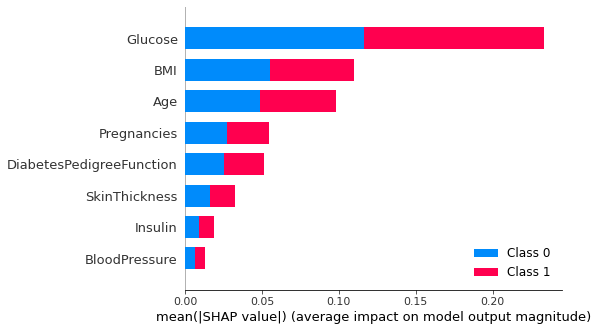

In [29]:
# Model Interpratation
import shap
value=shap.TreeExplainer(tuned_model).shap_values(x_test)
shap.summary_plot(value,x_train, plot_type='bar', feature_names=list(X.columns))

# Model automation and Deployment

In [31]:
from pycaret.classification import *
df=pd.read_csv("data/diabetes.csv")


In [32]:
# init setup
from pycaret.classification import *
clf1 = setup(data = df, target = 'Outcome')

# compare models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7804,0.8237,0.6124,0.7276,0.6618,0.5017,0.5080,0.9860
ridge,Ridge Classifier,0.7673,0.0000,0.5758,0.7172,0.6352,0.4682,0.4768,0.0200
gbc,Gradient Boosting Classifier,0.7655,0.8350,0.6282,0.6939,0.6544,0.4782,0.4835,0.0710
lda,Linear Discriminant Analysis,0.7636,0.8203,0.5758,0.7075,0.6304,0.4604,0.4689,0.0100
ada,Ada Boost Classifier,0.7600,0.8225,0.6174,0.6697,0.6371,0.4599,0.4649,0.0590
rf,Random Forest Classifier,0.7432,0.8142,0.5658,0.6634,0.6063,0.4189,0.4246,0.1410
lightgbm,Light Gradient Boosting Machine,0.7431,0.8047,0.6074,0.6530,0.6254,0.4312,0.4346,0.0260
et,Extra Trees Classifier,0.7246,0.7878,0.5295,0.6333,0.5742,0.3744,0.3790,0.1240
knn,K Neighbors Classifier,0.7057,0.7422,0.5342,0.5901,0.5561,0.3387,0.3422,0.0200
dt,Decision Tree Classifier,0.7021,0.6762,0.5866,0.5770,0.5798,0.3495,0.3511,0.0060


In [33]:
model=create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6296,0.7519,0.4211,0.4706,0.4444,0.1680,0.1685
1,0.7593,0.8353,0.4737,0.7500,0.5806,0.4236,0.4456
2,0.7778,0.8030,0.6316,0.7059,0.6667,0.5008,0.5025
3,0.8148,0.8962,0.7895,0.7143,0.7500,0.6035,0.6054
4,0.7037,0.7406,0.5789,0.5789,0.5789,0.3504,0.3504
5,0.7037,0.7338,0.4211,0.6154,0.5000,0.2998,0.3107
6,0.7222,0.8412,0.5000,0.6667,0.5714,0.3721,0.3805
7,0.7547,0.8390,0.5263,0.7143,0.6061,0.4339,0.4445
8,0.6604,0.7330,0.4737,0.5294,0.5000,0.2441,0.2449


In [35]:
save_model(model, 'rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Outcome',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [36]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
%%writefile app.py
import streamlit as st
import pandas as pd
from pycaret.classification import load_model, predict_model

model=load_model('rf')

st.title("app to check if a patient has diabetes")

# crete the frontend user interface
preg=st.number_input('Pregnancies', min_value=0)
glucose=st.slider('Glucose',min_value=0.0, max_value=200.0)
bp=st.slider('BloodPressure',min_value=0.0, max_value=200.0)
skin=st.slider('SkinThickness',min_value=0.0, max_value=20.0)
insulin=st.slider('Insulin',min_value=0.0, max_value=200.0)
bmi=st.slider('BMI',min_value=0.0, max_value=50.0)
dbf=st.slider('DiabetesPedigreeFunction',min_value=0.0 ,max_value=10.0)
age=st.slider('Age', min_value=20.0, max_value=100.0)


input_data={
    'Pregnancies':preg,
    'Glucose':glucose,
    'BloodPressure':bp,
    'SkinThickness':skin,
    'Insulin':insulin,
    'BMI':bmi,
    'DiabetesPedigreeFunction':dbf,
    'Age':age
    
}

input_data=pd.DataFrame([input_data])
st.write(input_data)

prediction=predict_model(model, input_data)
predicted_outcome=prediction['Label'][0]
output=str(predicted_outcome)
if st.button('Predict'):
    if output=='1':
        st.success('this person has diabetes')
    else:
        st.success("NO Diabetes")

Overwriting app.py
